Mall Customer Segmentation Data (Clustering and Data Visualization) uygulamamız için modellerimizi kaydedeceğiz

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X_scaled = scaler.fit_transform(X)

In [12]:
from sklearn.cluster import KMeans

In [13]:
k = 5

In [14]:
kmeans = KMeans(n_clusters=k, random_state=42)

In [15]:
labels = kmeans.fit_predict(X_scaled)

In [16]:
from sklearn.metrics import silhouette_score

In [17]:
score = silhouette_score(X_scaled, labels)

In [18]:
print("Silhouette Score:", score)

Silhouette Score: 0.5546571631111091


In [19]:
import matplotlib.pyplot as plt

In [20]:
import seaborn as sns

In [21]:
df["Cluster"] = labels

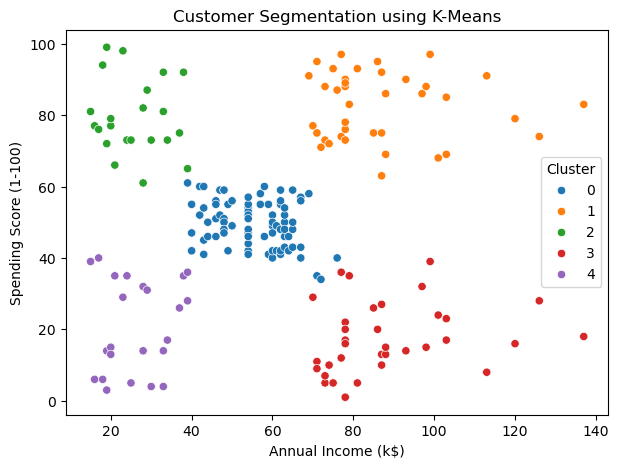

In [22]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="tab10",
    data=df
)

plt.title("Customer Segmentation using K-Means")
plt.show()

In [23]:
df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [24]:
import joblib

In [25]:
joblib.dump(kmeans, "kmeans_model.pkl")

['kmeans_model.pkl']

In [26]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']